In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid, StratifiedKFold

from sklearn.datasets import load_digits
# 始终预测多类
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from mglearn.datasets import make_blobs

from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [73]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print('Test set score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test set score: 0.88


# 模型评估与改进

## 交叉验证

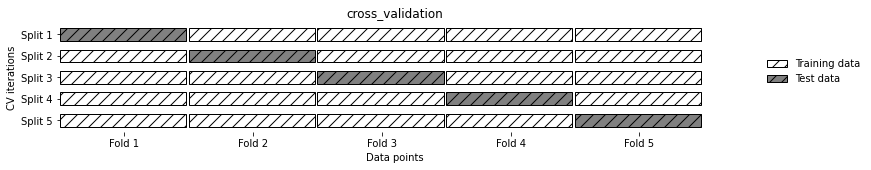

In [74]:
mglearn.plots.plot_cross_validation()

### scikit-learn中的交叉验证

In [75]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1_000)
scores = cross_val_score(logreg, iris.data, iris.target)
print('Cross-validation scores: {}'.format(scores))

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average cross-validation score: 0.97


In [76]:
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
res_df = pd.DataFrame(res)
res_df

,fit_time,score_time,test_score,train_score
0,0.013669,0.000999,0.966667,0.966667
1,0.014561,0.000000,1.000000,0.966667
2,0.021148,0.001005,0.933333,0.983333
3,0.022057,0.000000,0.966667,0.983333
4,0.015610,0.000000,1.000000,0.975000


In [77]:
print('Mean times and scores: \n',res_df.mean(axis=0))

Mean times and scores: 
 fit_time       0.017409
score_time     0.000401
test_score     0.973333
train_score    0.975000
dtype: float64


### 交叉验证的优点

### 分层k折交叉验证和其他策略

In [78]:
iris = load_iris()
print('Iris labels: \n{}'.format(iris.target))

Iris labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


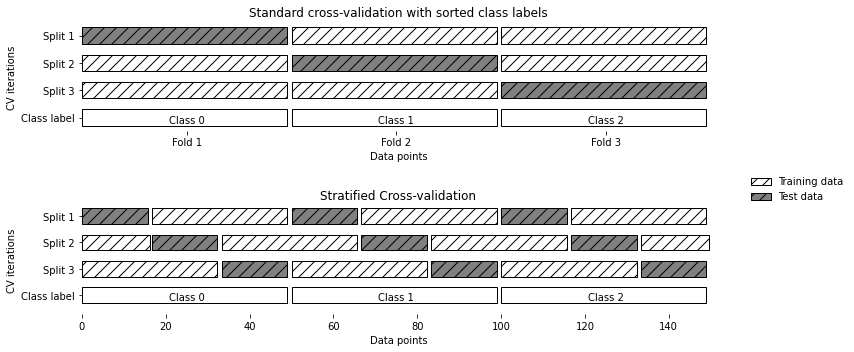

In [79]:
mglearn.plots.plot_stratified_cross_validation()

#### 对交叉验证的更多控制

In [80]:
kfold = KFold(n_splits=5)

In [81]:
print('Cross-validation scores: \n{}'.format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores: 
[1.         1.         0.86666667 0.93333333 0.83333333]


In [82]:
kfold = KFold(n_splits=3)
print('Cross-validation scores: \n{}'.format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores: 
[0. 0. 0.]


In [83]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print('Cross-validation scores: \n{}'.format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)
))

Cross-validation scores: 
[0.98 0.96 0.96]


#### 留一法交叉验证

In [84]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print('Number of cv iterations: ', len(scores))
print('Mean accuracy: {:.2f}'.format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 打乱划分交叉验证

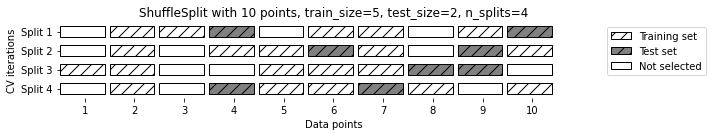

In [85]:
mglearn.plots.plot_shuffle_split()

In [86]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print('Cross-validation scores: \n{}'.format(scores))

Cross-validation scores: 
[0.94666667 0.96       0.92       0.94666667 0.94666667 0.97333333
 0.93333333 0.96       0.92       0.96      ]


#### 分组交叉验证

In [87]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print('Cross-validation accuracy: \n{}'.format(scores))

Cross-validation accuracy: 
[0.75       0.6        0.66666667]


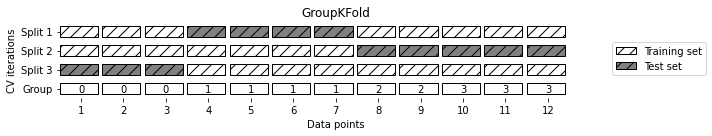

In [88]:
mglearn.plots.plot_group_kfold()

## 网格搜索

### 简单网格搜索

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
print('Size of training ste: {} size of test set: {}'.format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))

Size of training ste: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 参数过拟合的风险与验证集

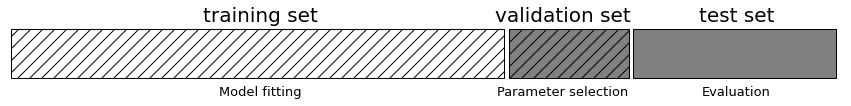

In [90]:
mglearn.plots.plot_threefold_split()

In [91]:
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,
                                                      random_state=1)
print("Size of training set: {} size of validation set: {} size of test set: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print('Best score: {:.2f}'.format(best_score))
print('Best parameters: {}'.format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 带交叉验证的网格搜索

In [92]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [93]:
def plot_cross_val_selection():
    iris = load_iris()
    X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data,
                                                              iris.target,
                                                              random_state=0)

    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                               return_train_score=True)
    grid_search.fit(X_trainval, y_trainval)
    results = pd.DataFrame(grid_search.cv_results_)[:]

    best = np.argmax(results.mean_test_score.values)
    plt.figure(figsize=(10, 3))
    plt.xlim(-1, len(results))
    plt.ylim(0, 1.1)
    for i, (_, row) in enumerate(results.iterrows()):
        scores = row[['split%d_test_score' % i for i in range(5)]]
        marker_cv, = plt.plot([i] * 5, scores, '^', c='gray', markersize=5,
                              alpha=.5)
        marker_mean, = plt.plot(i, row.mean_test_score, 'v', c='r', alpha=1,
                                markersize=7, markeredgecolor='k')
        if i == best:
            marker_best, = plt.plot(i, row.mean_test_score, 'o', c='red',
                                    fillstyle="none", alpha=1, markersize=15,
                                    markeredgewidth=1)

    plt.xticks(range(len(results)), [str(x).strip("{}").replace("'", "") for x
                                     in grid_search.cv_results_['params']],
               rotation=90)
    plt.ylabel("Validation accuracy")
    plt.xlabel("Parameter settings")
    plt.legend([marker_cv, marker_mean, marker_best],
               ["cv accuracy", "mean accuracy", "best parameter setting"],
               loc=(1.05, .4))

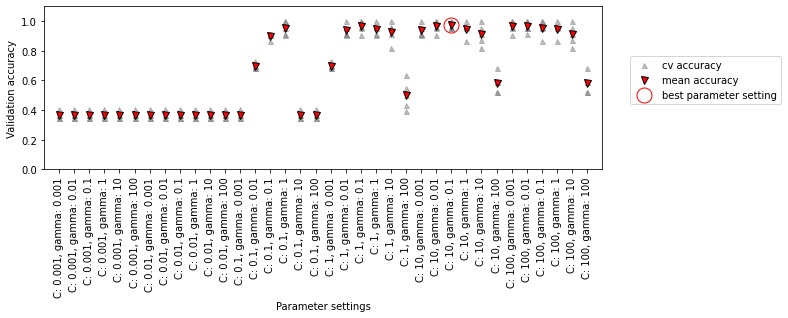

In [94]:
plot_cross_val_selection()

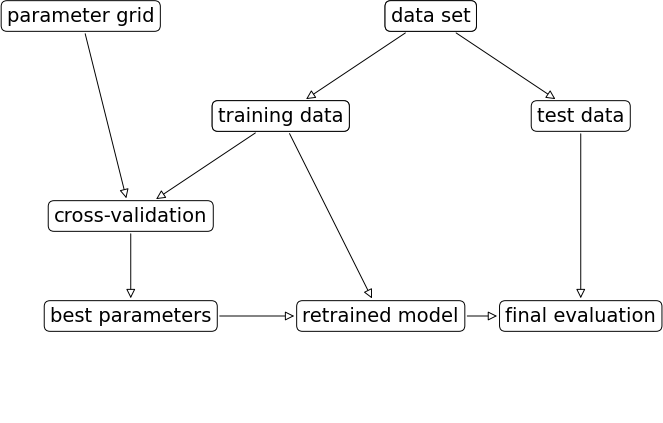

In [95]:
mglearn.plots.plot_grid_search_overview()

In [96]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Parameter grid: \n{}'.format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0
)
grid_search.fit(X_train, y_train)

Parameter grid: 
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [97]:
print('Test set score: {:.2f}'.format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [98]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best cross-validation score: {:.2f}'.format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [99]:
print('Best estimator: \n{}'.format(grid_search.best_estimator_))

Best estimator: 
SVC(C=10, gamma=0.1)


#### 分析交叉验证的结果

In [100]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000749,0.000400,0.000812,0.000409,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000807,0.000403,0.000307,0.000403,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000804,0.000402,0.000399,0.000488,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000502,0.000446,0.000597,0.000488,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000719,0.000631,0.000288,0.000575,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


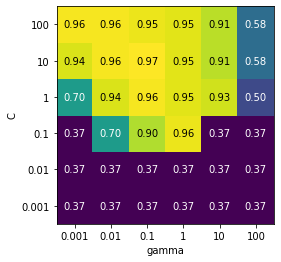

In [101]:
scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'])
plt.show()

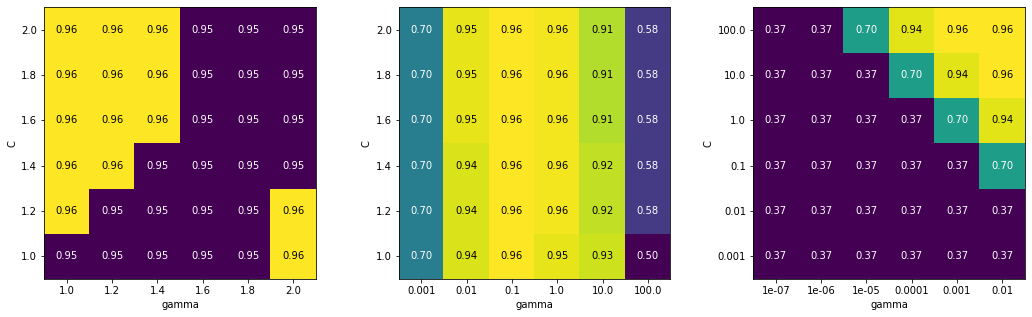

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}

# 10^-3至10^2
param_grid_one_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], ax=ax)

- 第一张图没有显示任何变化，整个参数网格的颜色相同。在这种情况下，这是由参数 C 和
gamma 不正确的缩放以及不正确的范围造成的。但如果对于不同的参数设置都看不到精度
的变化，也可能是因为这个参数根本不重要。通常最好在开始时尝试非常极端的值，以观
察改变参数是否会导致精度发生变化。
- 第二张图显示的是垂直条形模式。这表示只有 gamma 的设置对精度有影响。这可能意味
着 gamma 参数的搜索范围是我们所关心的，而 C 参数并不是——也可能意味着 C 参数并
不重要。
- 第三张图中 C 和 gamma 对应的精度都有变化。但可以看到，在图像的整个左下角都没有发
生什么有趣的事情。我们在后面的网格搜索中可以不考虑非常小的值。最佳参数设置出现
在右上角。由于最佳参数位于图像的边界，所以我们可以认为，在这个边界之外可能还有
更好的取值，我们可能希望改变搜索范围以包含这一区域内的更多参数。

#### 在非网格的空间中搜索

In [103]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [104]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [105]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00111,0.000931,0.000745,0.000394,0.001124,0.000923,0.000749,0.000923,0.0002,0.000396,...,0.000702,0.000599,0.001259,0.001001,0.001213,0.00042,0.0008,0.000401,0.000016,0.0
std_fit_time,0.0002,0.000522,0.000767,0.000482,0.000692,0.000518,0.000641,0.000192,0.0004,0.000486,...,0.000604,0.000489,0.00052,0.000032,0.000245,0.000515,0.0004,0.000491,0.000032,0.0
mean_score_time,0.000605,0.000199,0.000623,0.000857,0.000194,0.000796,0.000385,0.0,0.000801,0.000681,...,0.0004,0.000613,0.000807,0.000846,0.0,0.000712,0.000208,0.000193,0.000202,0.000508
std_score_time,0.000494,0.000399,0.000511,0.000443,0.000387,0.0004,0.000473,0.0,0.000401,0.000572,...,0.00049,0.000501,0.000403,0.000431,0.0,0.000599,0.000415,0.000385,0.000404,0.000448
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


#### 使用不同的交叉验证策略进行网格搜索

##### 嵌套交叉验证

In [106]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print('Cross-validation scores: ', scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


嵌套交叉验证的结果可以总结为“SVC 在 iris 数据集上的交叉验证平均精度为 98%”——不多也不少。

In [107]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(
                X[training_samples], y[training_samples]
            ):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [108]:
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5),
                   SVC, ParameterGrid(param_grid))
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


## 评估指标与评分

### 牢记最终目标

### 二分类指标

#### 错误类型

#### 不平衡数据集

In [109]:
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('Unique predicted labels: {}'.format(np.unique(pred_most_frequent)))
print('Test score: {:.2f}'.format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [110]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Test score: {:.2f}'.format(tree.score(X_test, y_test)))

Test score: 0.92


In [111]:
# 随机预测，并不是最大频率预测
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy score: {:.2f}'.format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=.1, max_iter=1_000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('Logreg score: {:.2f}'.format(logreg.score(X_test, y_test)))

dummy score: 0.90
Logreg score: 0.98


#### 混淆矩阵

In [112]:
confusion = confusion_matrix(y_test, pred_logreg)
print('Confusion matrix: \n{}'.format(confusion))

Confusion matrix: 
[[402   1]
 [  6  41]]


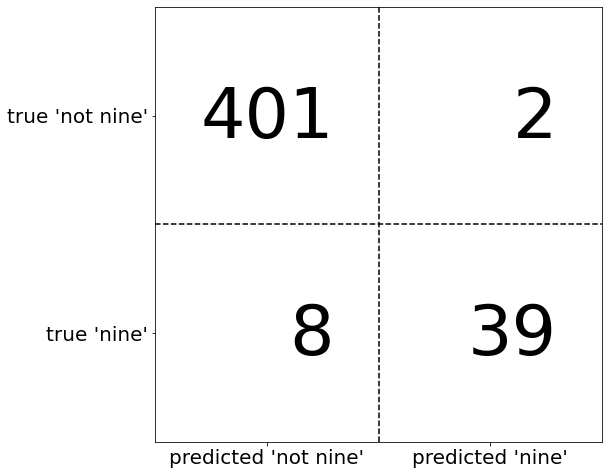

In [113]:
mglearn.plots.plot_confusion_matrix_illustration()

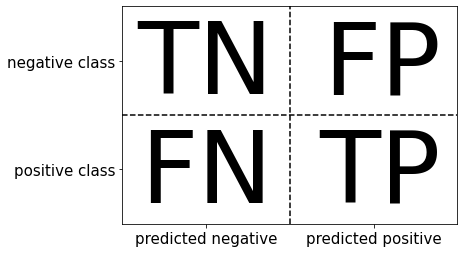

In [114]:
mglearn.plots.plot_binary_confusion_matrix()

In [115]:
print('Most frequent class:\n{}'.format(confusion_matrix(y_test, pred_most_frequent)))
print('Dummy model:\n{}'.format(confusion_matrix(y_test, pred_dummy)))
print('Decision tree:\n{}'.format(confusion_matrix(y_test, pred_tree)))
print('Logistic Regression:\n{}'.format(confusion_matrix(y_test, pred_logreg)))

Most frequent class:
[[403   0]
 [ 47   0]]
Dummy model:
[[403   0]
 [ 47   0]]
Decision tree:
[[390  13]
 [ 24  23]]
Logistic Regression:
[[402   1]
 [  6  41]]


In [116]:
print('f1 score most frequent: {:.2f}'.format(f1_score(y_test, pred_most_frequent)))
print('f1 score dummy: {:.2f}'.format(f1_score(y_test, pred_dummy)))
print('f1 score tree: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('f1 score logistic regression: {:.2f}'.format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [117]:
print(classification_report(y_test, pred_most_frequent, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
print(classification_report(y_test, pred_dummy, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
print(classification_report(y_test, pred_tree, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.94      0.97      0.95       403
        nine       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450



In [120]:
print(classification_report(y_test, pred_logreg, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



#### 考虑不确定性

In [121]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.5).fit(X_train, y_train)

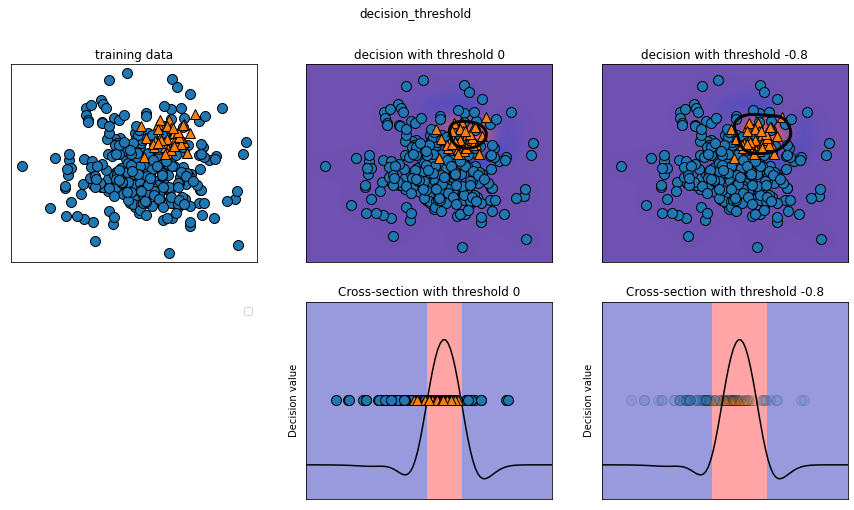

In [122]:
mglearn.plots.plot_decision_threshold()

In [123]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [124]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



#### 精确率-召回率曲线

In [125]:
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

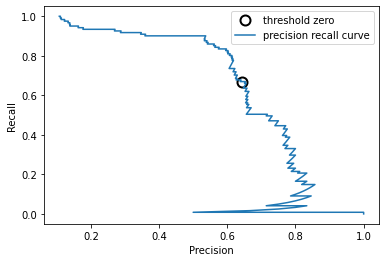

In [127]:
X, y = make_blobs(n_samples=(4_000, 500), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)
)
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label='threshold zero', fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label='precision recall curve')
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

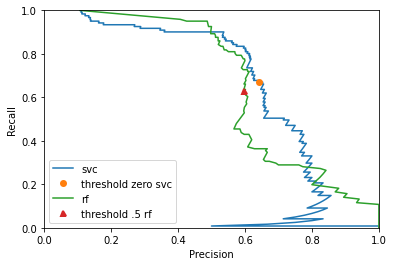

In [152]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')

plt.plot(precision[close_zero], recall[close_zero], 'o', 
         markersize=5, label='threshold zero svc', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - .5))
plt.plot(precision_rf, recall_rf, label='rf')
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^',
         label='threshold .5 rf', mew=2, markersize=5)
plt.legend()
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

In [154]:
print('f1_score of random forest: {:.3f}'.format(f1_score(y_test, rf.predict(X_test))))
print('f1_score of svc: {:.3f}'.format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [160]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('Average precision of random forest: {:.3f}'.format(ap_rf))
print('Average precision of svc: {:.3f}'.format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


#### 受试者工作特征（ROC）与AUC

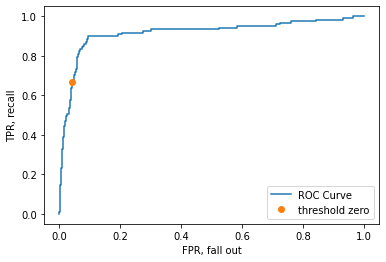

In [171]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('FPR, fall out')
plt.ylabel('TPR, recall')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero,], tpr[close_zero], 'o', markersize=5, label='threshold zero', mew=2)
plt.legend()
plt.show()

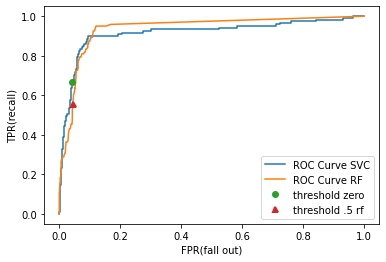

In [182]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve SVC')
plt.plot(fpr_rf, tpr_rf, label='ROC Curve RF')
plt.plot(fpr[close_zero,], tpr[close_zero], 'o', markersize=5, label='threshold zero', mew=2)
close_default_zero = np.argmin(np.abs(thresholds-.5))
plt.plot(fpr_rf[close_default_zero,], tpr_rf[close_default_zero], '^', markersize=5, label='threshold .5 rf', mew=2)
plt.legend()
plt.xlabel('FPR(fall out)')
plt.ylabel('TPR(recall)')
plt.show()

In [189]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('AUC for Random Forest: {:.3f}'.format(rf_auc))
print('AUC for SVC: {:.3f}'.format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


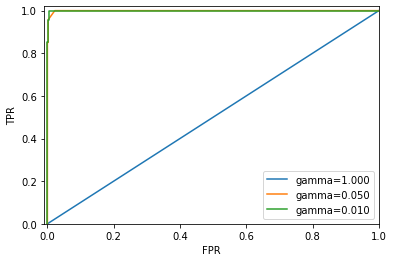

In [198]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, .05, .01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print('gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.3f}'.format(gamma))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-.01, 1)
plt.ylim(0, 1.02)
plt.legend()
plt.show()

### 多分类指标

In [4]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5_000).fit(X_train, y_train)
pred = lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


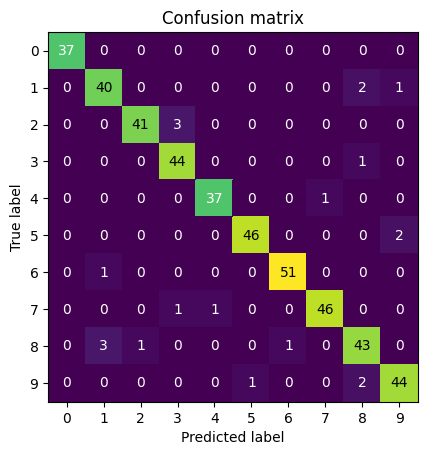

In [5]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, fmt='%d'
)
plt.title('Confusion matrix')
plt.gca().invert_yaxis()
plt.show()

In [7]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [9]:
print('Micro average f1 score: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('Macro average f1 score: {:.3f}'.format(f1_score(y_test, pred, average='macro')))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


### 回归指标

### 在模型选择中使用评估指标

In [15]:
print('Default scoring: {}'.format(cross_val_score(SVC(), digits.data, digits.target)))

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target, scoring='accuracy')
print('Explicit accuracy scoring: {}'.format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring='roc_auc')
print('AUC scoring: {}'.format(roc_auc))

Default scoring: [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
Explicit accuracy scoring: [0.96111111 0.94444444 0.98328691 0.98885794 0.93871866]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0
)
param_grid = {'gamma': [.001, .01, .1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print('Grid-Search with accuracy')
print('Best parameters: ', grid.best_params_)
print('Best cross-validation score (accuracy): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters:  {'gamma': 0.001}
Best cross-validation score (accuracy): 0.996
Test set AUC: 1.000
Test set accuracy: 0.991


In [27]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)
print('Grid-Search with AUC')
print('Best parameters: ', grid.best_params_)
print('Best cross-validation score (AUC): {:.3f}'.format(grid.best_score_))
print('Test set AUC: {:.3f}'.format(roc_auc_score(y_test, grid.decision_function(X_test))))
print('Test set accuracy: {:.3f}'.format(grid.score(X_test, y_test)))

Grid-Search with AUC
Best parameters:  {'gamma': 0.001}
Best cross-validation score (AUC): 0.999
Test set AUC: 1.000
Test set accuracy: 1.000


In [30]:
from sklearn.metrics._scorer import SCORERS
print('Available scores: \n{}'.format(sorted(SCORERS.keys())))

Available scores: 
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted',

## 小结与展望